In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/Kaggle/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/titanic/test.csv')

In [ ]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("train data shape : ",train.shape)
print("test data shape : ",test.shape)
print("--------------[Train data Info]--------------")
print(train.info())
print("--------------[Test data Info]--------------")
print(test.info())

train data shape :  (891, 12)
test data shape :  (418, 11)
--------------[Train data Info]--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------[Test data Info]--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (tot

In [ ]:
print("--------------[Train NULL data Info]--------------")
print(train.isnull().sum())
print("--------------[Test NULL data Info]--------------")
print(test.isnull().sum())

--------------[Train NULL data Info]--------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------[Test NULL data Info]--------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Pclass는 티켓 등급
# Pclass가 3인 사람들의 생존률이 비교적 낮다.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 여성의 생존률이 비교적 높다

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# SibSp는 배우자나 형제자매의 수
# 배우자나, 형제자매가 1~2인 사람들의 생존률이 비교적 높다.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Parch는 부모 자식 명수의 합
# 부모 or 자식이 1~3명 있는 사람들의 생존률이 비교적 높다.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
import seaborn as sns #Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지, 약간 요소들간의 연관성을 비교하고자 할때 편리한듯?
import matplotlib.pyplot as plt
%matplotlib inline  
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

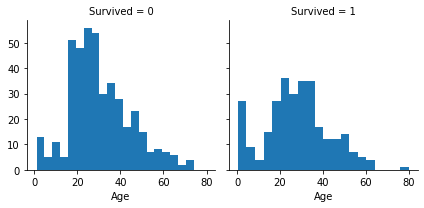

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)    # plt.hist는 그래프 종류설정 # bins는 구간설정

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


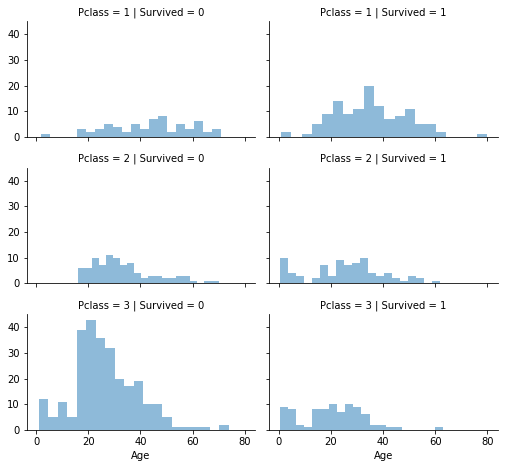

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend(); # 범례추가
# 1등급 사람들은 산사람들이 더 많고
# 3등급 사람들은 죽은사람들이 더 많다.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


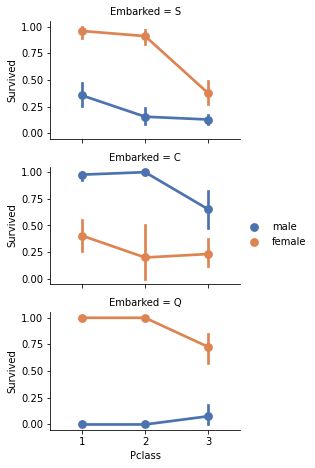

In [ ]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')     # palette는 이제 색 넣어주는 건데 'deep'은 약간 색에 효과넣는거 deep 외에 dark, bright 등등이 있음
grid.add_legend()
# Embarked는 승선한 곳
# 이 데이터를 보면 S,Q에서 탑승한 여성들이 비교적 생존했고
# C에서 탑승한 남자들이 비교적 생존했음 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


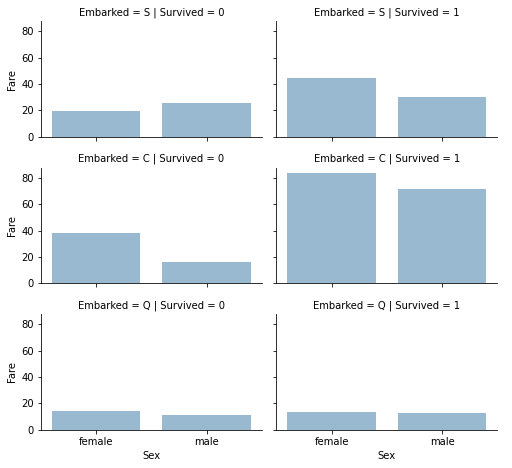

In [ ]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None) # ci는 오차범위, alpha는 투명도 0~1사이 값
grid.add_legend()
# Q에서 승선한 승객들을 제외하면 더 많은 금액을 낸 승객들이 더 잘 생존했음을 볼 수 있다.

In [ ]:
train_fix = train.drop(['Name', 'PassengerId','Cabin','Ticket'], axis=1)  # 딱히 영향없는 열 제거
test_fix = test.drop(['Name', 'PassengerId','Cabin','Ticket'], axis=1)

In [ ]:
train_fix=train_fix.dropna(subset=['Embarked']) # Embarked  2개 결측값 그냥 제거
#est_fix=test_fix.dropna(subset=['Embarked'])

In [ ]:
train_fix['Sex'] = train_fix['Sex'].map( {'female': 1, 'male': 0} ).astype(int) # 성별 값 0,1로 변환
test_fix['Sex'] = test_fix['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
train_fix['Embarked'] = train_fix['Embarked'].map( {'Q':2,'C': 1, 'S': 0} ).astype(int) # 승선 값 0,1,2로 변환
test_fix['Embarked'] = test_fix['Embarked'].map( {'Q':2,'C': 1, 'S': 0} ).astype(int)

In [ ]:
# Age 결측값은 평균 값으로 대체

train_fix['Age'].fillna(train_fix['Age'].mean(), inplace=True)
test_fix['Age'].fillna(test_fix['Age'].mean(), inplace=True)

In [ ]:
# Age를 약간 유아기 청소년기 청년 노인 이런식으로 나눠줌

train_fix['Age']=train_fix['Age'].apply(lambda x: 0 if x>=0 and x<6 else 1 if x>=6 and 
                                          x<13 else 2 if x>=13 and x<19 else 3 if x>=19 and
                                          x<35 else 4 if x>=35 and x<50 else 5) 

test_fix['Age']=test_fix['Age'].apply(lambda x: 0 if x>=0 and x<6 else 1 if x>=6 and
                                        x<13 else 2 if x>=13 and x<19 else 3 if x>=19 and
                                        x<35 else 4 if x>=35 and x<50 else 5)

In [ ]:
# 누락된 Fare값을 채우기 위해서 pclass와 연관시켜 평균값을 넣자
# pclass별 평균 요금
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print("test에서 null값의 Pclass")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

test에서 null값의 Pclass
152    3
Name: Pclass, dtype: int64


In [ ]:
# 누락된 Pclass가 3이므로 13.67.. 을 넣어줌
test_fix['Fare']=test_fix['Fare'].fillna(13.675550)

In [ ]:
# 승선요금도 구간별로 나눠줌

train_fix.loc[ train_fix['Fare'] <= 7.854, 'Fare'] = 0
train_fix.loc[(train_fix['Fare'] > 7.854) & (train_fix['Fare'] <= 10.5), 'Fare'] = 1
train_fix.loc[(train_fix['Fare'] > 10.5) & (train_fix['Fare'] <= 21.679), 'Fare']   = 2
train_fix.loc[(train_fix['Fare'] > 21.679) & (train_fix['Fare'] <= 39.688), 'Fare']   = 3
train_fix.loc[ train_fix['Fare'] > 39.688, 'Fare'] = 4
train_fix['Fare'] = train_fix['Fare'].astype(int)

test_fix.loc[ test_fix['Fare'] <= 7.854, 'Fare'] = 0
test_fix.loc[(test_fix['Fare'] > 7.854) & (test_fix['Fare'] <= 10.5), 'Fare'] = 1
test_fix.loc[(test_fix['Fare'] > 10.5) & (test_fix['Fare'] <= 21.679), 'Fare']   = 2
test_fix.loc[(test_fix['Fare'] > 21.679) & (test_fix['Fare'] <= 39.688), 'Fare']   = 3
test_fix.loc[ test_fix['Fare'] > 39.688, 'Fare'] = 4
test_fix['Fare'] = test_fix['Fare'].astype(int)

In [ ]:
train_fix.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,3,1,0,0,0
1,1,1,1,4,1,0,4,1
2,1,3,1,3,0,0,1,0
3,1,1,1,4,1,0,4,0
4,0,3,0,4,0,0,1,0


In [ ]:
print("train data shape : ",train_fix.shape)
print("test data shape : ",test_fix.shape)
print("--------------[Train data Info]--------------")
print(train_fix.info())
print("--------------[Test data Info]--------------")
print(test_fix.info())

train data shape :  (889, 8)
test data shape :  (418, 7)
--------------[Train data Info]--------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  889 non-null    int64
 1   Pclass    889 non-null    int64
 2   Sex       889 non-null    int64
 3   Age       889 non-null    int64
 4   SibSp     889 non-null    int64
 5   Parch     889 non-null    int64
 6   Fare      889 non-null    int64
 7   Embarked  889 non-null    int64
dtypes: int64(8)
memory usage: 62.5 KB
None
--------------[Test data Info]--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int64
 2   Age       418 non-null    int64
 3   SibSp     418 non-null    int64
 4   Par

In [ ]:
# 학습 데이터 만들기

# 원핫인코딩 : 나는 위에서 다 수동으로 해줬는데 그냥 이코드 써도댐
#train_fix = pd.get_dummies(train_fix)
#test_fix = pd.get_dummies(test_fix)

X_train = train_fix.drop("Survived", axis=1)
Y_train = train_fix["Survived"]
X_test  = test_fix
X_train.shape, Y_train.shape, X_test.shape

((889, 7), (889,), (418, 7))

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate=0.001,decay= 0.0)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
history = model.fit(
    X_train, 
    Y_train, 
    batch_size = 32, 
    epochs = 150,
    validation_split=0.2,    
)

Epoch 1/150
23/23 [==============================] - 1s 17ms/step - loss: 0.6275 - accuracy: 0.6554 - val_loss: 0.4780 - val_accuracy: 0.7978
Epoch 2/150
23/23 [==============================] - 0s 7ms/step - loss: 0.5514 - accuracy: 0.7145 - val_loss: 0.4291 - val_accuracy: 0.7921
Epoch 3/150
23/23 [==============================] - 0s 7ms/step - loss: 0.5348 - accuracy: 0.7412 - val_loss: 0.3914 - val_accuracy: 0.8202
Epoch 4/150
23/23 [==============================] - 0s 8ms/step - loss: 0.5110 - accuracy: 0.7736 - val_loss: 0.3899 - val_accuracy: 0.8146
Epoch 5/150
23/23 [==============================] - 0s 7ms/step - loss: 0.4944 - accuracy: 0.7581 - val_loss: 0.3785 - val_accuracy: 0.8539
Epoch 6/150
23/23 [==============================] - 0s 8ms/step - loss: 0.4879 - accuracy: 0.7862 - val_loss: 0.3834 - val_accuracy: 0.8371
Epoch 7/150
23/23 [==============================] - 0s 8ms/step - loss: 0.5053 - accuracy: 0.7637 - val_loss: 0.4053 - val_accuracy: 0.8427
Epoch 8/150


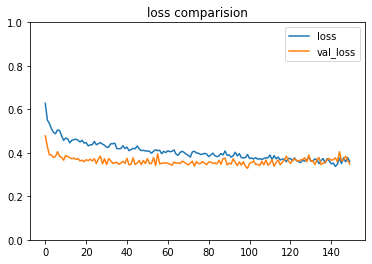

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot().set_ylim(0,1)
plt.title('loss comparision');

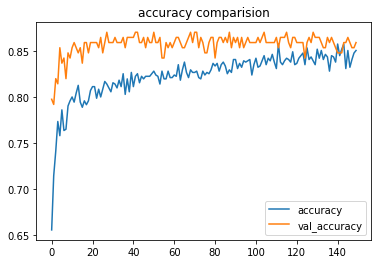

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('accuracy comparision');

In [ ]:
Y_pred = model.predict(X_test)
results = np.argmax(Y_pred,axis = 1)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": results
    })

submission.to_csv("my_titanic.csv",index=False)